# CHAP 1.4.13
### Hough Line Transform

Hough Transform in OpenCV

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('sIMG_2164.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,300)

In [3]:
lines.shape

(566, 1, 2)

In [4]:
for i in range(500):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

True

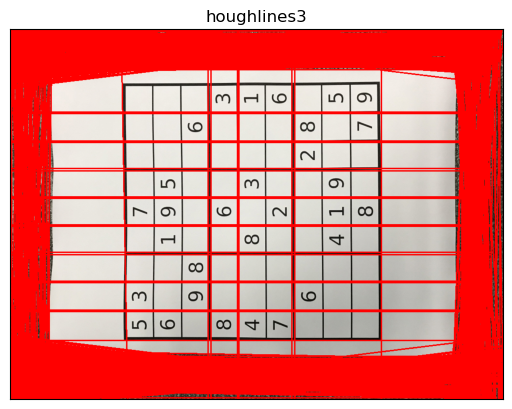

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('houghlines3'), plt.xticks([]), plt.yticks([])
cv2.imwrite('houghlines3.jpg',img)

Probabilistic Hough Transform

In [6]:
img = cv2.imread('sIMG_2164.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

In [7]:
lines.shape

(345, 1, 4)

True

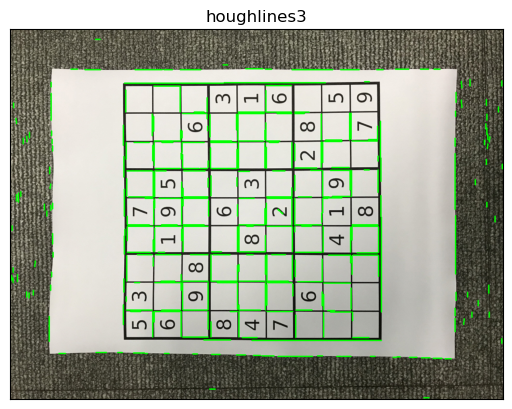

In [8]:
for i in range(340):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(img)
plt.title('houghlines3'), plt.xticks([]), plt.yticks([])
cv2.imwrite('houghlines5.jpg',img)

In [9]:
def nothing(x):
    pass

img = cv2.imread('sIMG_2164.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lineNums = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

In [10]:
cv2.namedWindow('image')

cv2.createTrackbar('minLineLength','image',0,500,nothing)
cv2.createTrackbar('maxLineGap','image',0,500,nothing)
cv2.createTrackbar('lineNums','image',0,100,nothing)
cv2.setTrackbarPos('minLineLength', 'image', minLineLength)
cv2.setTrackbarPos('maxLineGap', 'image', maxLineGap)
cv2.setTrackbarPos('lineNums', 'image', lineNums)

while(1):
    cv2.imshow('image',img)
    k=cv2.waitKey(1)&0xFF
    if k== 27:
        break
    
    minLineLength = cv2.getTrackbarPos('minLineLength', 'image')
    maxLineGap = cv2.getTrackbarPos('maxLineGap', 'image')
    lineNums = cv2.getTrackbarPos('lineNums', 'image')
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    lineNum = min(lineNums, lines.shape[0])
    for i in range(lineNum):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.destroyAllWindows()